### Categorical / Interval Variables

In [1]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/duane.hinkley/PycharmProjects/c772-capstone-project/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
filterDf  = load_df('filterDf')
descDf = load_df('descDf')
types = get_var_types()

#### Variable List

In [3]:
variable_types(descDf, 'Categorical Interval')

,category,variable
0,Assignment (a),assignment_due_date
1,Assignment (a),assignment_final_submission_date
2,Assignment (a),assignment_start_date
3,Assignment (a),max_student_stop_datetime
4,Assignment (a),min_student_start_datetime
5,Assignment Attempt (aa),scored_datetime
6,Assignment Attempt (aa),student_start_datetime
7,Assignment Attempt (aa),student_stop_datetime
8,Assignment Attempt (aa),was_fully_scored_datetime
9,Assignment Attempt (aa),was_in_progress_datetime


#### Statistics

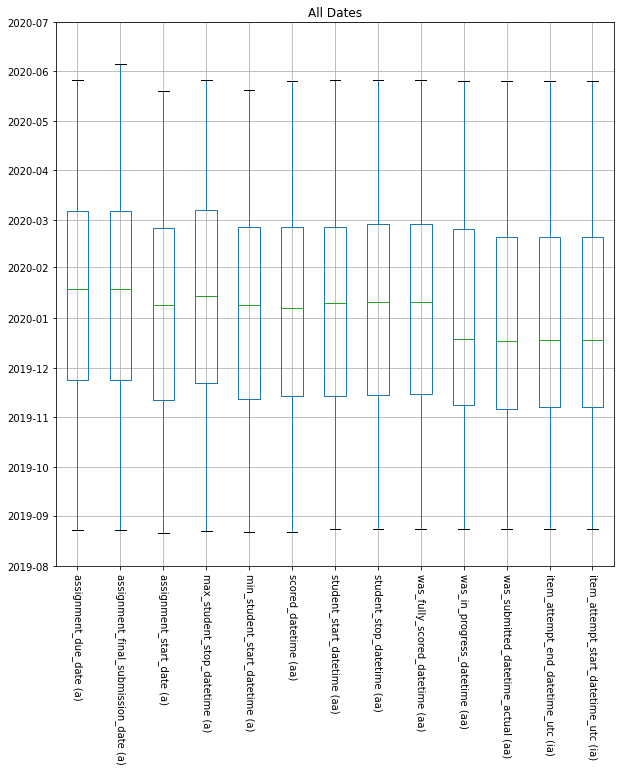

In [4]:
date_boxplot(get_random_sample(filterDf), "All Dates")

- Normally distributed
- Median of all dates around 1/15/2020

###### Relationship with predictor

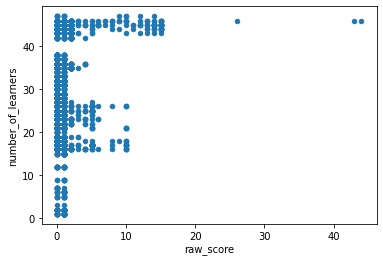

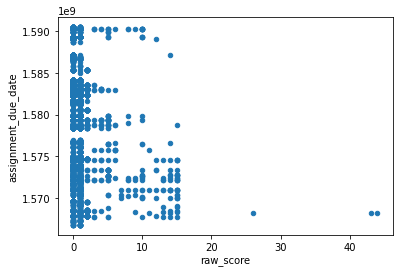

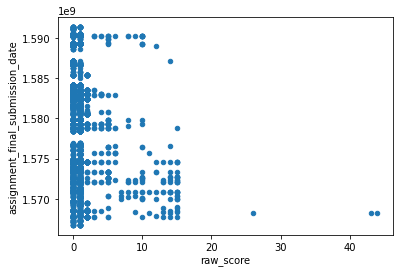

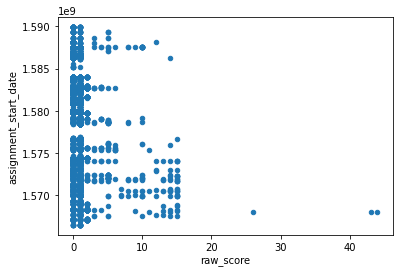

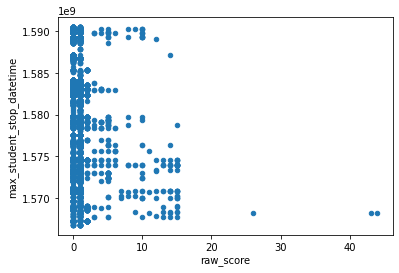

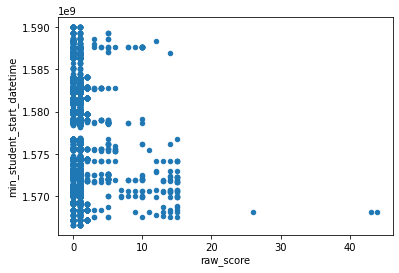

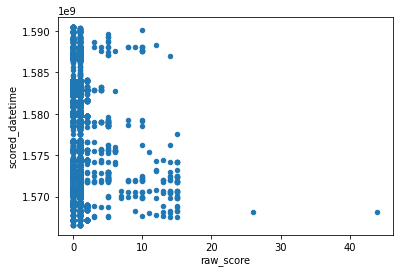

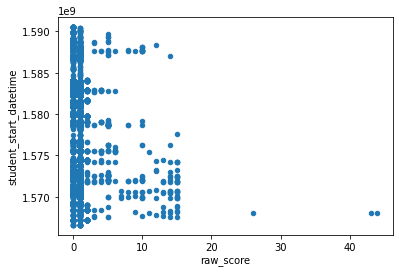

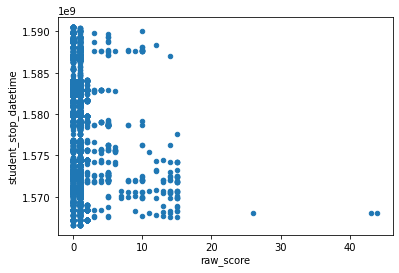

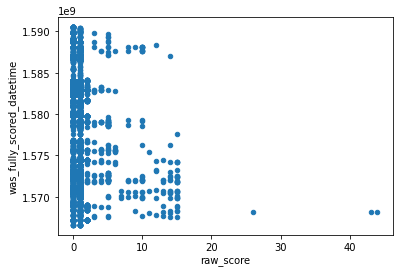

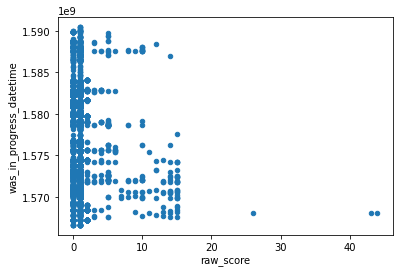

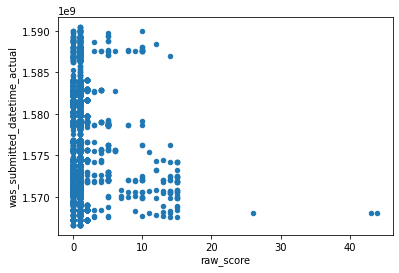

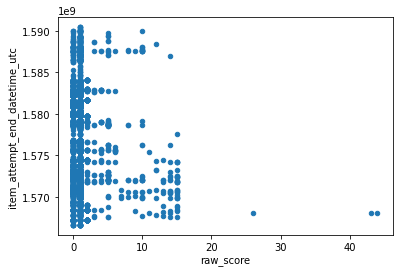

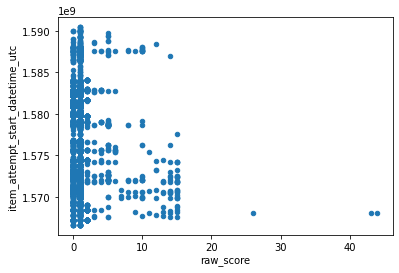

In [5]:
pdDf = get_random_sample(filterDf).select('number_of_learners', 'raw_score', * (F.unix_timestamp(c).alias(c) for c in types['intervalVars']) ).toPandas()
pdDf.plot.scatter('raw_score', 'number_of_learners')

for col in types['intervalVars']:
    pdDf.plot.scatter('raw_score', col)

- No relationship found
- Patterns similar amoung variables

In [6]:
dateStats = date_statisticts(filterDf, types['intervalVars'])
print ("Range", dateStats['min'].min(), "to", dateStats['max'].max())
dateStats

Range 2019-08-21 to 2020-06-05


,distinct,null,min,max
assignment_due_date,190,1566,2019-08-23,2020-05-26
assignment_final_submission_date,199,1566,2019-08-23,2020-06-05
assignment_start_date,206,1566,2019-08-21,2020-05-19
item_attempt_end_datetime_utc,64747,14999,2019-08-23,2020-05-26
item_attempt_start_datetime_utc,60182,14999,2019-08-23,2020-05-26
max_student_stop_datetime,521,0,2019-08-22,2020-05-26
min_student_start_datetime,613,0,2019-08-21,2020-05-20
scored_datetime,7187,3422,2019-08-21,2020-05-25
student_start_datetime,7385,749,2019-08-22,2020-05-26
student_stop_datetime,7127,749,2019-08-22,2020-05-26


Date Values
- Dates fall in range of a school year of 8/2019 to 5/2020
- Almost all variables have have null dates
  - except max_student_stop_datetime and max_student_stop_datetime
- 1566 null dates
    - in
      - assignment_due_date
      - assignment_final_submission_date
      - assignment_start_date
- 14999 null dates
  - item_attempt_start_datetime_utc
  - item_attempt_end_datetime_utc
- Verify same observations as 1566 [unassigned] in response_correctness'
- 749 t0 750 null dates
    - in
      - student_start_datetime
      - student_stop_datetime
      - was_fully_scored_datetime
- 3422 in scored_datetime
- 9965 in was_in_progress_datetime
- 18469 in was_submitted_datetime_actual

In [7]:
add_todo('Investigate 1566 null dates')
add_todo('Investigate 749 t0 750 null dates')
add_todo('Investigate 3422 null dates in scored_datetime')
add_todo('Investigate 9965 null dates in was_in_progress_datetime')
add_todo('Investigate 18469 null dates in was_submitted_datetime_actual')
add_todo('Investigate 14999 null dates in item attempt dates')

Todo: Investigate 1566 null dates
Todo: Investigate 749 t0 750 null dates
Todo: Investigate 3422 null dates in scored_datetime
Todo: Investigate 9965 null dates in was_in_progress_datetime
Todo: Investigate 18469 null dates in was_submitted_datetime_actual
Todo: Investigate 14999 null dates in item attempt dates


###### Correlations Heatmap

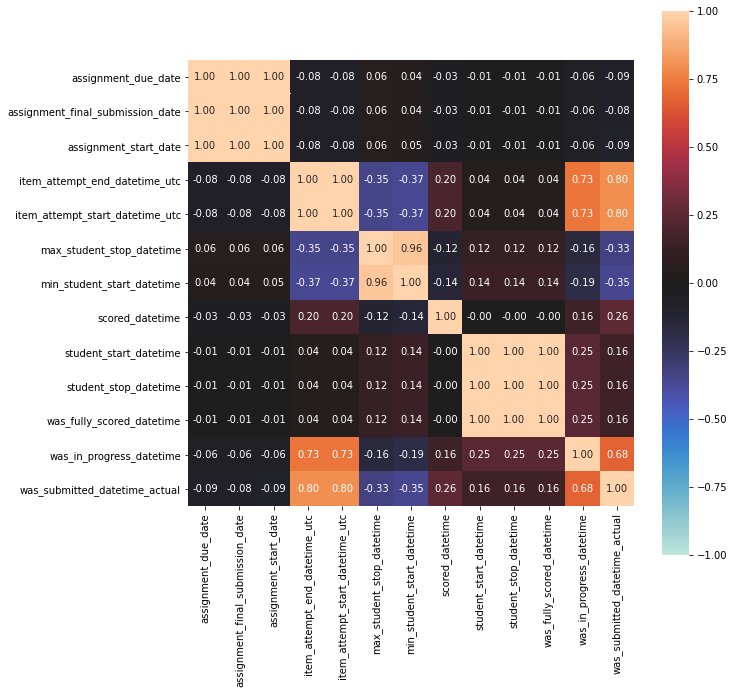

In [8]:
corr, ax = associations( filterDf.select(* (F.unix_timestamp(c).alias(c) for c in types['intervalVars']) ).toPandas(), figsize=[10,10] )

- Correlated dates
  - assignment_due_date and assignment_final_submission_date
  - assigment_due_date and assignment_start_date
  - min_student_start_datetime and max_student_start_datetime
  - student_start_datetime and student_stop_datetime
  - student_start_datetime and was_fully_scored_datetime
  - student_stop_datetime and was_fully_scored_datetime
  - item_attempt start and end with was_in_progress and was_submitted datetime
- Correlation appears to be because the events closely follow each other

###### Display Date Categories

In [9]:
(
    descDf.filter("type = 'Categorical Interval'")
        .select( F.col('type').alias('Category'), F.col('field').alias('Categorical Interval'))
        .orderBy('type', 'field')
        .show(20,False)
)

+--------------------+--------------------------------+
|Category            |Categorical Interval            |
+--------------------+--------------------------------+
|Categorical Interval|assignment_due_date             |
|Categorical Interval|assignment_final_submission_date|
|Categorical Interval|assignment_start_date           |
|Categorical Interval|item_attempt_end_datetime_utc   |
|Categorical Interval|item_attempt_start_datetime_utc |
|Categorical Interval|max_student_stop_datetime       |
|Categorical Interval|min_student_start_datetime      |
|Categorical Interval|scored_datetime                 |
|Categorical Interval|student_start_datetime          |
|Categorical Interval|student_stop_datetime           |
|Categorical Interval|was_fully_scored_datetime       |
|Categorical Interval|was_in_progress_datetime        |
|Categorical Interval|was_submitted_datetime_actual   |
+--------------------+--------------------------------+



###### Mean Days Between All Interval Vars

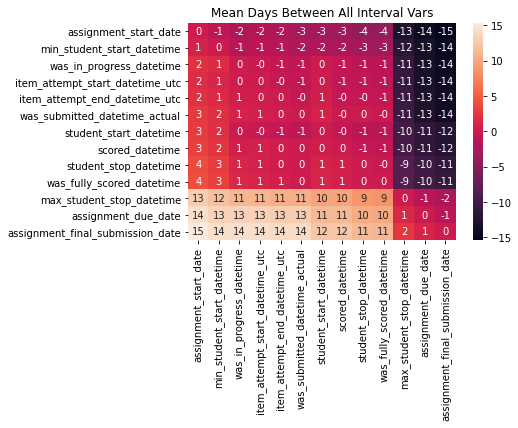

In [10]:
cats = get_var_cats()
# Ordered Interval Vars
allIntVars = [
    'assignment_start_date',
    'min_student_start_datetime',
    'was_in_progress_datetime',
    'item_attempt_start_datetime_utc',
    'item_attempt_end_datetime_utc',
    'was_submitted_datetime_actual',
    'student_start_datetime',
    'scored_datetime',
    'student_stop_datetime',
    'was_fully_scored_datetime',
    'max_student_stop_datetime',
    'assignment_due_date',
    'assignment_final_submission_date',
]

sampDf = get_random_sample(filterDf)

date_diff_map(sampDf.select(allIntVars).toPandas(), "Mean Days Between All Interval Vars", 'D')

###### Mean Hours Between Assignment Interval Vars

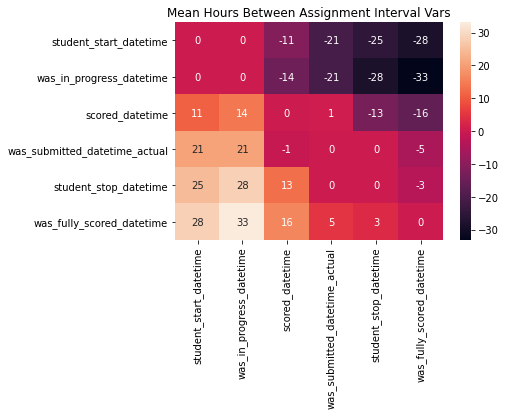

In [11]:
mean_hours_assignment_interval(sampDf)

- Sequence of dates
  - student_start_datetime
  - was_in_progress_datetime (+0 hours)
  - item_attempt_start_datetime_utc (+5 hours)
  - item_attempt_end_datetime_utc (+8 hours)
  - was_submitted_datetime_actual (+8 hours)
  - scored_datetime (+2 hours)
  - student_stop_datetime (+5 hours)
  - was_fully_scored_datetime (+5 hours)

###### Mean Hours Between Assignment Attempt Interval Vars

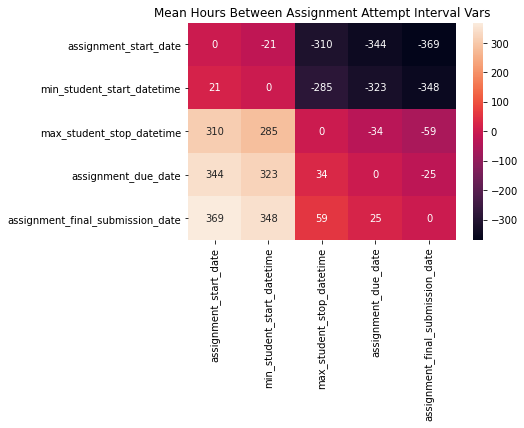

In [12]:
# attemptIntVars = [i for i in allIntVars if i not in cats['assignmentAttemptVars']]
attemptIntVars = [
'assignment_start_date',
'min_student_start_datetime',
'max_student_stop_datetime',
'assignment_due_date',
'assignment_final_submission_date',
]

date_diff_map(sampDf.select(attemptIntVars).toPandas(), "Mean Hours Between Assignment Attempt Interval Vars", 'h')

- Sequence of dates
  - assignment_start_date
  - min_student_start_datetime (+25 hours)
  - max_student_stop_datetime (+325 hours, 13 days)
  - assignment_due_date (+38 hours)
  - assignment_final_submission_date (+46 hours)


#### Durations between dates

In [13]:
durDf = add_attempt_duration(sampDf)

durDf.select(types['durationVars']).toPandas().describe()

,item_attempt_duration_mins,student_duration_mins,timeliness_duration_mins
count,6571.000000,8051.000000,7893.000000
mean,517.564775,1500.937604,16335.411597
std,3344.052486,7373.941943,25216.955979
min,-35188.133333,-1362.766667,-205701.133333
25%,0.400000,4.533333,1407.883333
50%,1.816667,21.916667,5840.083333
75%,9.308333,72.133333,20899.700000
max,67541.183333,206222.850000,126226.066667


- Outliers
  - all duration vars
  - negative values in min
    - stop dates before start dates

In [ ]:
add_todo('Investigate attempt stop dates before start date')
add_todo('Investigate max durations outliers in item and student attempt times')
